Importing the Required Libraries

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


Reading the Data

In [ ]:
df=pd.read_csv('drug200.csv')

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Treating Missing Values

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

from the above result there is no missing value

In [ ]:
df.Sex.value_counts()


M    104
F     96
Name: Sex, dtype: int64

In [ ]:
df.BP.value_counts()


HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [ ]:
df.Cholesterol.value_counts()


HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [ ]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

It can be seen that from results above, DrugY has more amount than other types of drugs, so the data is imbalanced and we would need to treat this later

#Dataset exploration

#1.Numerical variable

In [ ]:
#This section will show mean, count, std, min, max and others using describe function

In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
skewAge = df.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


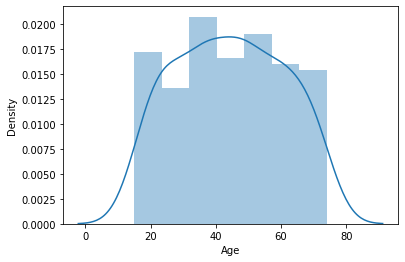

In [ ]:
sns.distplot(df['Age']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


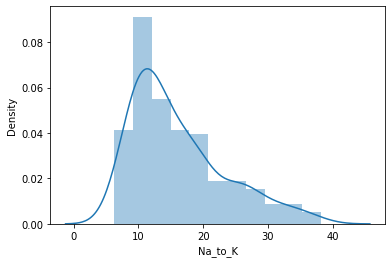

In [ ]:
sns.distplot(df['Na_to_K']);


In [ ]:
skewNatoK = df.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


*The distribution of 'Age' column is symetric, since the skewness value between -0.5 and 0.5.

*The distribution of 'Na_to_K' column is moderately skewed, since the skewness value is between 0.5 and 1. 
It can also be seen from the histogram for 'Na_to_K' column

In [ ]:
#(1).categorical variables

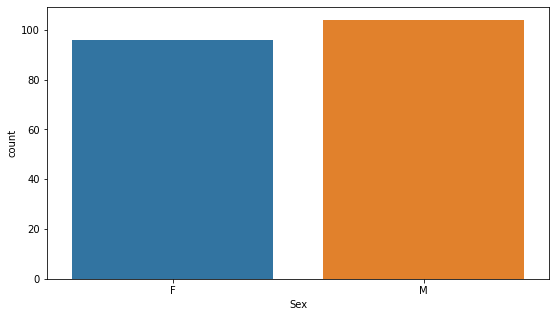

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(x = df.Sex)
plt.show()

In [ ]:
#The ratio of gender seems balanced in the data
#This is a categorical variable. It would be better if we apply label encoder to avoid any error during model implementation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


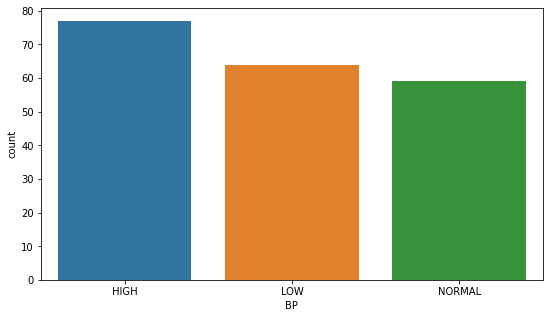

In [ ]:
plt.figure(figsize = (9,5))
sns.countplot(df.BP)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


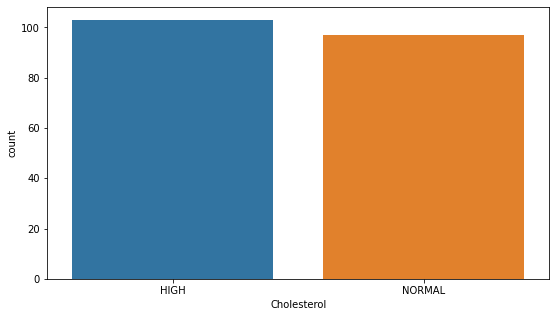

In [ ]:
plt.figure(figsize = (9,5))
sns.countplot(df.Cholesterol)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


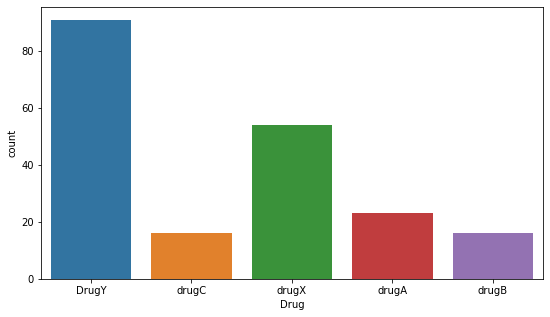

In [ ]:
plt.figure(figsize = (9,5))
sns.countplot(df.Drug)
plt.show()

In [ ]:
#Drug is target column and you can see that it is unbalanced dataset. Using K Fold cross-validation would be better for reliable results.

In [ ]:
#checking for outlier

In [ ]:
#sns.boxplot(data=df)
#plt.show()

In [ ]:
#def boundaries(data,variable):
#  LL=(data[variable].quantile(.25))-(((data[variable].quantile(.75))-(data[variable].quantile(.25)))*1.5)
 #   UL=(data[variable].quantile(.75))+(((data[variable].quantile(.75))-(data[variable].quantile(.25)))*1.5)
#  return LL,UL

In [ ]:
#cols=['Na_to_K']

In [ ]:
#for col in cols:
#    LL,UL=boundaries(df,col)
    
#  df[col]=np.where(df[col]<LL,LL,
#                           np.where(df[col]>UL,UL,df[col]))

In [ ]:
# sns.boxplot(data=df)
#plt.show()

# Label Encoding

We will convert from object to int64

Sex,
BP,
Cholesterol,
Na_to_K


In [76]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])

In [78]:
label_list = ["Sex","BP","Cholesterol","Na_to_K","Drug"]

for l in label_list:
    label_encoder(l)

In [79]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


In [84]:
from sklearn.model_selection import train_test_split

x = df.drop(["Drug"],axis=1)
y = df.Drug

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

In [85]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (160, 5)
x_test shape: (40, 5)
y_train shape: (160,)
y_test shape: (40,)


# Fix Imbalance Data

In [86]:
smote = SMOTE()

In [87]:
x_train , y_train = smote.fit_resample(x_train , y_train)

In [88]:
y_train.value_counts()

4    76
0    76
3    76
1    76
2    76
Name: Drug, dtype: int64

In [ ]:
#model implementation

# 1.Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression 

In [122]:
lr = LogisticRegression()

In [123]:
lr.fit(x_train , y_train)

LogisticRegression()

In [124]:
prediction = lr.predict(x_test)

In [125]:
accuracy_score(y_test , prediction)

0.975

In [126]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00        11

    accuracy                           0.97        40
   macro avg       0.99      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40



# 2.Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(x_train, y_train)

y_pred = DTclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      0.80      0.89         5
           4       0.92      1.00      0.96        11

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40

[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  1]
 [ 0  0  0  0 11]]
Decision Tree accuracy is: 97.50%


# 3.K Neighbours



In [113]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, x_train, y_train, cv=5)
knn.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(x_test,y_test))

Train Score: 0.718421052631579
Test Score: 0.55


# 4.RandomForestClassifier

In [112]:
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, x_train, y_train, cv=5)
rfc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(x_test,y_test))

Train Score: 0.9842105263157895
Test Score: 1.0


# 5.GridSearchCV

In [114]:
grid = {'n_estimators':np.arange(100,1000,100),
        'criterion':['gini','entropy']
       }

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf,grid,cv=5)
rf_cv.fit(x_train,y_train)

print("Hyperparameters:",rf_cv.best_params_)
print("Train Score:",rf_cv.best_score_)
print("Test Score:",rf_cv.score(x_test,y_test))

Hyperparameters: {'criterion': 'gini', 'n_estimators': 100}
Train Score: 0.9842105263157895
Test Score: 1.0


# 6.SVM Classifier¶


In [131]:
from sklearn.svm import SVC
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, x_train, y_train, cv=5)
svc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(x_test,y_test))

Train Score: 0.6210526315789473
Test Score: 0.6
